# 2 Hypothesis testing - comparing the mean of 2 groups
Run a t-test to compare whether the average monthly return of AAPL is greater than the average monthly returns of MSFT

In [19]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np

H0 : mean(r_AAPL) > mean(r_MSFT)  ==>  H0: mean(r_AAPL) - mean(r_MSFT) = 0
Ha: mean(r_AAPL) < mean(r_MSFT)   ==>  Ha: mean(r_AAPL) - mean(r_MSFT) != 0

VARIABLE OF STUDY = DIFFERENCE OF BOTH MEAN RETURNS
dif = mean(r_AAPL) - mean(r_MSFT)
H0: dif = 0
Ha: dif != 0

## AAPL

In [15]:

# Collecting the real data from returns of AAPL from July 2019 until July 2022 monthly (60 months)
AAPL = pdr.get_data_yahoo("AAPL", start = "2017-07-01", end = "2022-05-31", interval = "m")
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-01,176.649994,152.000000,174.009995,165.119995,1.627516e+09,164.439545
2022-03-01,179.610001,150.100006,164.699997,174.610001,2.180800e+09,174.111984
2022-04-01,178.490005,155.380005,174.029999,157.649994,1.687796e+09,157.200348
2022-05-01,166.479996,132.610001,156.710007,148.839996,2.401040e+09,148.415482
2022-06-01,151.740005,129.039993,149.899994,136.720001,1.749100e+09,136.530350


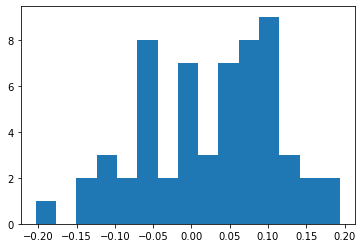

In [29]:
# Calculating the monthly cc returns
AAPL["r"] = (np.log(AAPL["Adj Close"]) - np.log(AAPL["Adj Close"].shift(1)))
# Plotting the cc returns
plt.hist(AAPL['r'], bins=15)
plt.show()

In [30]:
# We calculate the mean of the cc returns
AAPL_mean = AAPL['r'].mean()
AAPL_mean

0.022998402961812832

In [34]:
# We calculate the std of the group
AAPL_std = AAPL['r'].std() / np.sqrt(AAPL["r"].count())
AAPL_std

0.011317974045594498

## MSFT

In [42]:
# Collecting the real data from returns of MSFT from July 2019 until July 2022 monthly
MSFT = pdr.get_data_yahoo("MSFT", start = "2017-07-01", end = "2022-05-31", interval = "m")
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-01,315.119995,271.519989,310.410004,298.790009,697050600.0,297.480591
2022-03-01,315.950012,270.000000,296.399994,308.309998,734334200.0,307.593567
2022-04-01,315.109985,270.000000,309.369995,277.519989,627343400.0,276.875122
2022-05-01,290.880005,246.440002,277.709991,271.869995,742902000.0,271.238251
2022-06-01,277.690002,241.509995,275.200012,256.829987,621372300.0,256.829987


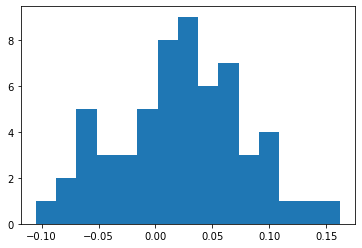

In [43]:
# Calculating the monthly cc returns
MSFT["r"] = np.log(MSFT["Adj Close"]) - np.log(MSFT["Adj Close"].shift(1))
# Plotting the cc returns
plt.hist(MSFT["r"], bins = 15)
plt.show()

In [44]:
# Calculating the mean of the cc returns
MSFT_mean = MSFT["r"].mean()
MSFT_mean

0.02250024490874485

In [46]:
# Calculating the standard deviation of the cc returns
MSFT_std = MSFT["r"].std() / np.sqrt(MSFT["r"].count())
MSFT_std

0.007412906320414428

## Calculating the t-statistic

t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / se  => Remember that the standard error is the standard deviation of the variable of study.

Then:
t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / SD(mean(r_APPL) - mean(r_MSFT)) => The standard deviation can be calculated with the squared root of the variance of this difference

Then:
t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / sqrt((1/N)(Var(r_AAPL) + Var(r_MSFT)))

In [48]:
# Calculating the t-statisitc
t = (AAPL_mean - MSFT_mean -0) / np.sqrt((1 / MSFT["r"].count()) * (AAPL_std**2 + MSFT_std**2))
t

0.28282057658575654

SINCE THE RESULT OF THE T-STATISTIC IS THAT THE DIFFERENCE BETWEEN THE TOW MEANS IS 0.28 STANDARD DEVIATIONS, WE CANNOT DETERMINE THAT NEITHER OF THE HYPOTHESIS ARE CONFIRMED. 

# 3 Measures of linear relationshop
 Imagine we want to see whether there is a relationship between the OIL price and the Microsoft stock price.